## Analytical results

In [3]:
#Using sympy
import warnings

# Importing modules
import numpy as np
import pandas as pd

# Importing Differential equation numerical solver
from scipy.integrate import odeint

# Import plotting modules
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

#Importing module useful for graphics
import seaborn as sns

# Module for symbolic expressions
import sympy

# print outputs in LaTeX form
sympy.init_printing(use_unicode=True) 

# Interactive manipulations in the notebook
# from ipywidgets import StaticInteract, RangeWidget, RadioWidget
from ipywidgets import interact

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# a set of variables and parameters for species 1, species 2 and species 3

# Species 1
r1, a11, n1, a12, a13 = sympy.symbols('r_1 a_11 n_1 a_12 a_13')

# Species 2
r2, a21, n2, a22, a23 = sympy.symbols('r_2 a_21 n_2 a_22 a_23 ')

# Species 3
r3, a31, n3, a32, a33 = sympy.symbols('r_3 a_31 n_3 a_32 a_33 ')

In [5]:
#system equations governing interaction and interconnection of species
dn1_dt = n1*(r1 -a11*n1 - a12*n2-a13*n3)
dn2_dt = n2*(r2 -a21*n1 - a22*n2-a23*n3)
dn3_dt = n3*(r3 -a31*n1 - a32*n2-a33*n3)

In [6]:
#printing equations in latex form
dn1_dt, dn2_dt, dn3_dt

In [7]:
#Equating equations to zero
ss_n1 = sympy.Eq(dn1_dt, 0)
ss_n2 = sympy.Eq(dn2_dt, 0)
ss_n3 = sympy.Eq(dn3_dt, 0)
ss_n1, ss_n2, ss_n3

The steady state solution for the three species are:


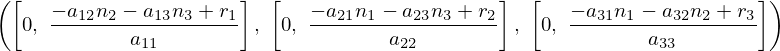

In [8]:
#Solve equations
ss_n1_sol = sympy.solve(ss_n1, n1)
ss_n2_sol = sympy.solve(ss_n2, n2)
ss_n3_sol = sympy.solve(ss_n3, n3)
print('The steady state solution for the three species are:')
ss_n1_sol, ss_n2_sol, ss_n3_sol

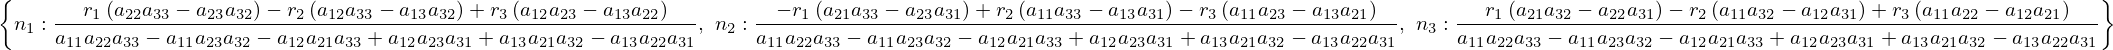

In [9]:
#Solving for a solution where all species exist
ss_dict = sympy.solve((sympy.Eq(n1, ss_n1_sol[1]), sympy.Eq(n2, ss_n2_sol[1]), sympy.Eq(n3, ss_n3_sol[1])),
                      (n1, n2,n3))
ss_dict


In [10]:
# Generate 'lambdify' functions to numerically evaluate the system of equations
dn1_dt_num = sympy.utilities.lambdify([n1, n2,n3, r1, a11, a12, a13], dn1_dt)
dn2_dt_num = sympy.utilities.lambdify([n2, n1,n3, r2, a21, a22,a23], dn2_dt)
dn3_dt_num = sympy.utilities.lambdify([n3, n1,n2, r3, a31, a32,a33], dn3_dt)


def lotka_voltera_rhs(N1_N2_N3, t, *p):
    '''
    Set up the right hand side (rhs) function for the system 
    (necessary step to feed sympy's odeint function).
    '''
    # unpack the variables
    N1, N2, N3 = N1_N2_N3
    
    # unpack the parameters
    r_1, A_11, A_12, A_13, r_2, A_21,A_22, A_23, r_3, A_31,A_32, A_33=p
    
    # Define derivatives from lambdified functions
    N1dot = dn1_dt_num(N1, N2,N3, r_1, A_11, A_12, A_13)
    N2dot = dn2_dt_num(N2, N1, N3, r_2, A_21,A_22, A_23)
    N3dot = dn3_dt_num(N3, N1, N2, r_3, A_31,A_32, A_33)

    return np.array([N1dot, N2dot,N3dot])

In [11]:
# let's set the parameter values.
r_1, r_2, r_3 = [0.5, 0.5, 0.5]
A_11, A_22,A_33 = [0.8, 1.2, 0.8]
A_12, A_23,A_13 = [1.2, 0.9,0.7]
A_21, A_32,A_31 = [0.26, 0.21,0.21]
args1 = (r_1, A_11, A_12, A_13, r_2, A_21,A_22, A_23, r_3, A_31,A_32, A_33)

# Initial population size
N1_N2_N3_0 = [2, 2, 2]

# Time points we want to consider
t = np.linspace(0, 100, 1000)

# Solving he function use odeint to solve t
N1_N2_N3 = odeint(lotka_voltera_rhs, N1_N2_N3_0, t, args=args1)


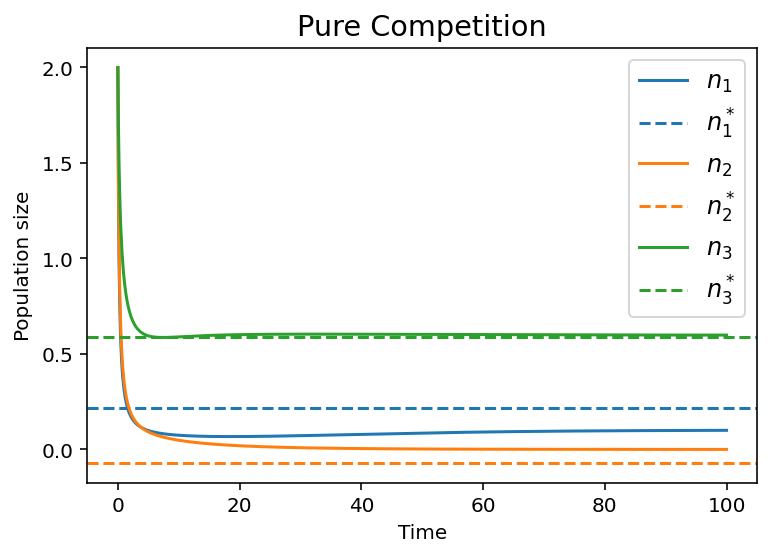

In [12]:
#ploting to check if the solutions will converge to stead states
for i, N in enumerate([n1, n2, n3]):
    plt.plot(t, N1_N2_N3[:, i], label=r'${0:s}$'.format(sympy.latex(N)))
    plt.axhline(y=ss_dict[N].subs({r1: r_1, r2: r_2, r3:r_3,a11:A_11, a12:A_12,a13:A_13, a21:A_21, a22:A_22, a23:A_23, a31:A_31, a32:A_32, a33:A_33}),
                linestyle='--', color=sns.color_palette()[i],
                label=r'${0:s}^*$'.format(sympy.latex(N)))

plt.legend(loc=0, fontsize=12)
plt.rcParams.update({'font.size':12})
plt.title ('Pure Competition')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.savefig("steadystate")
plt.show()

In [13]:
# let's set the parameter values.
r_1, r_2, r_3 = [2, 2, 2]
A_11, A_22,A_33 = [0.8, 1.2, 0.8]
A_12, A_23,A_13 = [1.2, 1.2,0.7]
A_21, A_32,A_31 = [0.7, 0.7,1.2]
args1 = (r_1, A_11, A_12, A_13, r_2, A_21,A_22, A_23, r_3, A_31,A_32, A_33)

# Initial population size
N1_N2_N3_0 = [2, 2, 2]

# Time points we want to consider
t = np.linspace(0, 100, 1000)

# Solving he function use odeint to solve t
N1_N2_N3 = odeint(lotka_voltera_rhs, N1_N2_N3_0, t, args=args1)


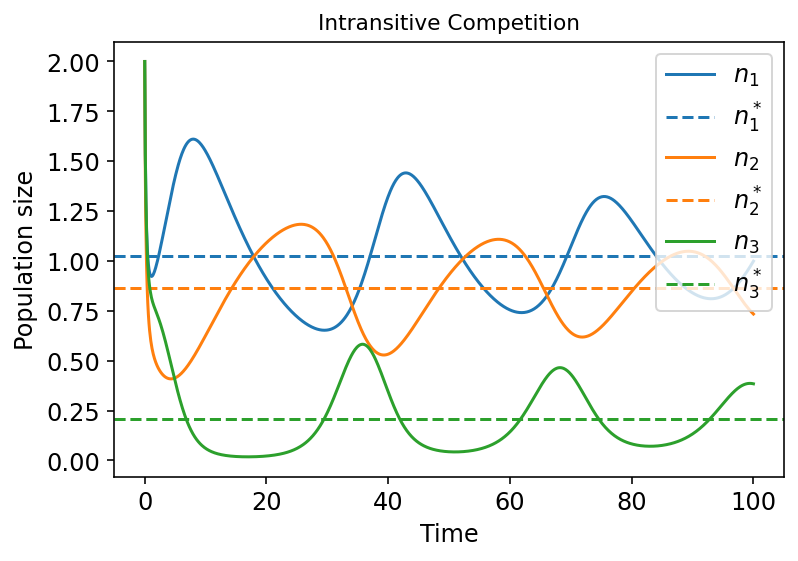

In [14]:
#ploting to check if the solutions will converge to stead states
for i, N in enumerate([n1, n2, n3]):
    plt.plot(t, N1_N2_N3[:, i],label=r'${0:s}$'.format(sympy.latex(N)))
    plt.axhline(y=ss_dict[N].subs({r1: r_1, r2: r_2, r3:r_3,a11:A_11, a12:A_12,a13:A_13, a21:A_21, a22:A_22, a23:A_23, a31:A_31, a32:A_32, a33:A_33}),
                linestyle='--', color=sns.color_palette()[i],
                label=r'${0:s}^*$'.format(sympy.latex(N)))

plt.legend(loc=1, fontsize=12)
plt.rcParams.update({'font.size':9})
plt.xlabel('Time')
plt.title ('Intransitive Competition')
plt.ylabel('Population size')
plt.savefig("steadintra")
plt.show()

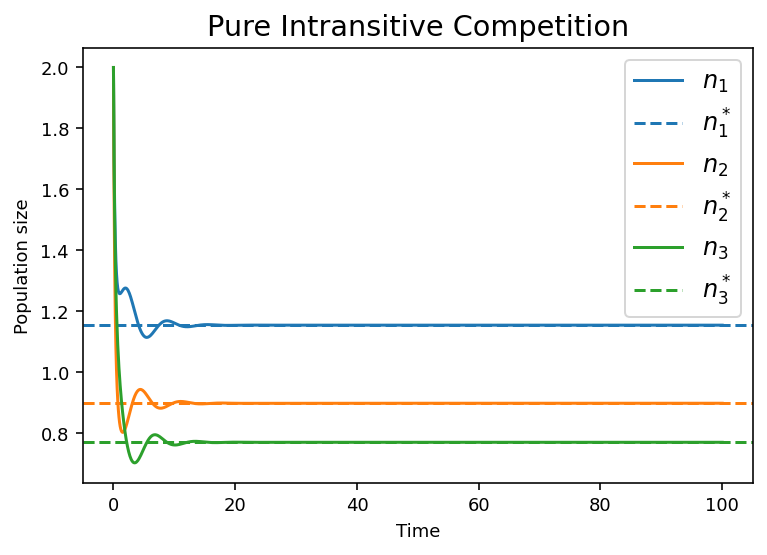

In [15]:
# let's set the parameter values.
r_1, r_2, r_3 = [2, 2, 2]
A_11, A_22,A_33 = [0.8, 1.2, 0.8]
A_12, A_23,A_13 = [1.2, 1.2,0.0]
A_21, A_32,A_31 = [0.0, 0.0,1.2]
args1 = (r_1, A_11, A_12, A_13, r_2, A_21,A_22, A_23, r_3, A_31,A_32, A_33)

# Initial population size
N1_N2_N3_0 = [2, 2, 2]

# Time points we want to consider
t = np.linspace(0, 100, 1000)

# Solving he function use odeint to solve t
N1_N2_N3 = odeint(lotka_voltera_rhs, N1_N2_N3_0, t, args=args1)

#ploting to check if the solutions will converge to stead states
for i, N in enumerate([n1, n2, n3]):
    plt.plot(t, N1_N2_N3[:, i],label=r'${0:s}$'.format(sympy.latex(N)))
    plt.axhline(y=ss_dict[N].subs({r1: r_1, r2: r_2, r3:r_3,a11:A_11, a12:A_12,a13:A_13, a21:A_21, a22:A_22, a23:A_23, a31:A_31, a32:A_32, a33:A_33}),
                linestyle='--', color=sns.color_palette()[i],
                label=r'${0:s}^*$'.format(sympy.latex(N)))

plt.legend(loc=1, fontsize=12)
plt.rcParams.update({'font.size':12})
plt.xlabel('Time')
plt.ylabel('Population size')
plt.title ('Pure Intransitive Competition')
plt.savefig("steadpureintra")
plt.show()

## Analytical solution of non-dimensionalised model (sage)

In [1]:
#steady states for non-dimensionalised model
x,y,z,a,b,c,d,e,f,g,i = var('x y z a b c d e f g i')
f1 = x - x*x - x*y - x*z
f2 = a*y - b*x*y - c*y*y - d*y*z
f3 = e*z - f*x*z - g*y*z - i*z*z
solve([f1==0,f2==0,f3==0],x,y,z)

/srv/sage-9.3/local/lib/python3.9/site-packages/mpmath/ctx_mp_python.py:892: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:
/srv/sage-9.3/local/lib/python3.9/site-packages/mpmath/ctx_mp_python.py:986: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if other is 0:


[[x == 0, y == 0, z == 0], [x == 1, y == 0, z == 0], [x == 0, y == a/c, z == 0], [x == (a - c)/(b - c), y == -(a - b)/(b - c), z == 0], [x == 0, y == 0, z == e/i], [x == (e - i)/(f - i), y == 0, z == -(e - f)/(f - i)], [x == 0, y == (d*e - a*i)/(d*g - c*i), z == -(c*e - a*g)/(d*g - c*i)], [x == ((c - d)*e - (a - d)*g + (a - c)*i)/((c - d)*f - (b - d)*g + (b - c)*i), y == -((b - d)*e - (a - d)*f + (a - b)*i)/((c - d)*f - (b - d)*g + (b - c)*i), z == ((b - c)*e - (a - c)*f + (a - b)*g)/((c - d)*f - (b - d)*g + (b - c)*i)]]

## Analytical Solutions of Characteristic Polynomial (sage)

In [5]:
#function for hurwitz matrix
def hurwitz_determinant(p, k):
    d = p.degree()
    a = list(reversed(p.list()))
    return matrix([[a[2*i-j+1] if 2*i-j+1 >= 0 and 2*i-j+1 <= d else 0 for j in range(k)] for i in range(k)]).det()

In [3]:
#function for Hurwizts ,matrix
def hurwitz_determinants(p):
    d = p.degree()
    a = list(reversed(p.list()))
    H = matrix([[a[2*i-j+1] if 2*i-j+1 >= 0 and 2*i-j+1 <= d else 0 for j in range(d)] for i in range(d)])
    return [H[0:k,0:k].det() for k in range(1,d+1)]



In [4]:
#let lambda = z and insert in the characterstic plynomial p(lambda)
K.<a11,a12,a13,a21,a22,a23,a31,a32,a33> = PolynomialRing(QQ)
R.<z> = PolynomialRing(K)
p = z^3 - z^2*(-a11 - a22 - a33) - z*((a12*a21-a11*a22) + ( a13*a31-a11*a33) + (a23*a32-a22*a33))-(-a11*(a22*a33 - a23*a32)+a12*(a21*a33 -a23*a31)-a13*(a21*a32-a22*a31)) 
hurwitz_determinants(p)


[a11 + a22 + a33,
 -a11*a12*a21 + a11^2*a22 - a12*a21*a22 + a11*a22^2 - a11*a13*a31 - a12*a23*a31 - a13*a21*a32 - a22*a23*a32 + a11^2*a33 + 2*a11*a22*a33 + a22^2*a33 - a13*a31*a33 - a23*a32*a33 + a11*a33^2 + a22*a33^2,
 a11*a12*a13*a21*a22*a31 - a11^2*a13*a22^2*a31 + a12*a13*a21*a22^2*a31 - a11*a13*a22^3*a31 - a11*a12^2*a21*a23*a31 + a11^2*a12*a22*a23*a31 - a12^2*a21*a22*a23*a31 + a11*a12*a22^2*a23*a31 + a11*a13^2*a22*a31^2 - a11*a12*a13*a23*a31^2 + a12*a13*a22*a23*a31^2 - a12^2*a23^2*a31^2 - a11*a12*a13*a21^2*a32 + a11^2*a13*a21*a22*a32 - a12*a13*a21^2*a22*a32 + a11*a13*a21*a22^2*a32 + a11^2*a12*a21*a23*a32 - a11^3*a22*a23*a32 + a11*a12*a21*a22*a23*a32 - a11^2*a22^2*a23*a32 - a11*a13^2*a21*a31*a32 + a13^2*a21*a22*a31*a32 + a11^2*a13*a23*a31*a32 - 2*a12*a13*a21*a23*a31*a32 + a13*a22^2*a23*a31*a32 + a11*a12*a23^2*a31*a32 - a12*a22*a23^2*a31*a32 - a13^2*a21^2*a32^2 + a11*a13*a21*a23*a32^2 - a13*a21*a22*a23*a32^2 + a11*a22*a23^2*a32^2 + a11*a12^2*a21^2*a33 - 2*a11^2*a12*a21*a22*a33 + a12^

In [5]:

all(hd > 0 for hd in hurwitz_determinants(p))
p.roots()

[]

### Numerical Simulations of eigenvalues

In [6]:
#pure competition
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 1.2
a21 = 0.26
a23 = 0.9
a32 = 0.21
a31 = 0.21
K.<a11,a12,a13,a21,a22,a23,a31,a32,a33> = PolynomialRing(QQ)
R.<z> = PolynomialRing(K)
p = z^3 - z^2*(-0.8 - 1.2 - 0.8) - z*((1.2*0.26-0.8*1.2) + ( 1.2*0.21-0.8*0.8) + (0.9*0.21-1.2*0.8))-(-0.8*(1.2*0.8 - 1.2*0.21)+1.2*(0.26*0.8 -0.9*0.31)-1.2*(0.26*0.21-1.2*0.21)) 
hurwitz_determinants(p)

[2.80000000000000, 4.64488000000000, 1.92632463360000]

In [7]:
#intansitive
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 1.2
a21 = 0.7
a23 = 1.2
a32 = 0.7
a31 = 1.2
K.<a11,a12,a13,a21,a22,a23,a31,a32,a33> = PolynomialRing(QQ)
R.<z> = PolynomialRing(K)
p = z^3 - z^2*(-0.8 - 1.2- 0.8) - z*((1.2*0.7-0.8*1.2) + ( 1.2*1.2-0.8*0.8) + (1.2*0.7-1.2*0.8))-(-0.8*(1.2*0.8 - 1.2*0.7)+1.2*(0.7*0.8 -1.2*1.2)-1.2*(0.7*0.7-1.2*1.2)) 
hurwitz_determinants(p)

[2.80000000000000, -1.58000000000000, -0.0189600000000004]

In [8]:
#pure intransitive
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 0.0
a21 = 0.0
a23 = 1.2
a32 = 0.0
a31 = 1.2
K.<a11,a12,a13,a21,a22,a23,a31,a32,a33> = PolynomialRing(QQ)
R.<z> = PolynomialRing(K)
p = z^3 - z^2*(-0.8 - 1.2 - 0.8) - z*((1.2*0.0-0.8*1.2) + ( 0.0*1.2-0.8*0.8) + (1.2*0.0-1.2*0.8))-(-0.8*(1.2*0.8- 1.2*0.0)+1.2*(0.0*0.8 -1.2*1.2)-0.0*(0.0*0.0-1.2*1.2)) 
hurwitz_determinants(p)

[2.80000000000000, 4.67200000000000, 11.6613120000000]

In [9]:
all(hd  for hd in hurwitz_determinants(p))
p.roots()

[(-2.14923027645007, 1)]

## Pure Competititive System

## Different initial values

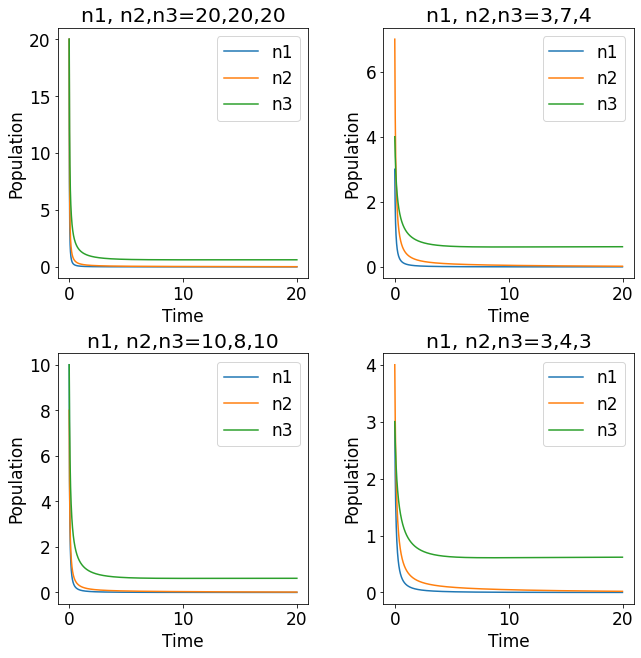

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 1.2
a21 = 0.26
a23 = 0.9
a32 = 0.21
a31 = 0.21
r1 = 0.5
r2 = 0.5
r3 = 0.5

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 7, 4]
n30 = [20,10, 4,3]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(10,10))


for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])

    # Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(t,n1, label= "n1")
        axs[i, 0].plot( t, n2,  label= "n2")
        axs[i, 0].plot( t, n3, label= "n3")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i,0].set_ylabel('Population',fontsize=17)
        axs[i,0].set_xlabel('Time',fontsize=17)
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(t,n1,label= "n1" )
        axs[j, 1].plot( t, n2,  label= "n2")
        axs[j, 1].plot( t, n3, label= "n3")
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j,1].set_ylabel('Population', fontsize=17)
        axs[j,1].set_xlabel('Time',fontsize=17)
        axs[j,1].legend()

plt.rcParams.update({'font.size':17})
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig("numpure")
plt.show()


## Phase potraits for Pure Competition

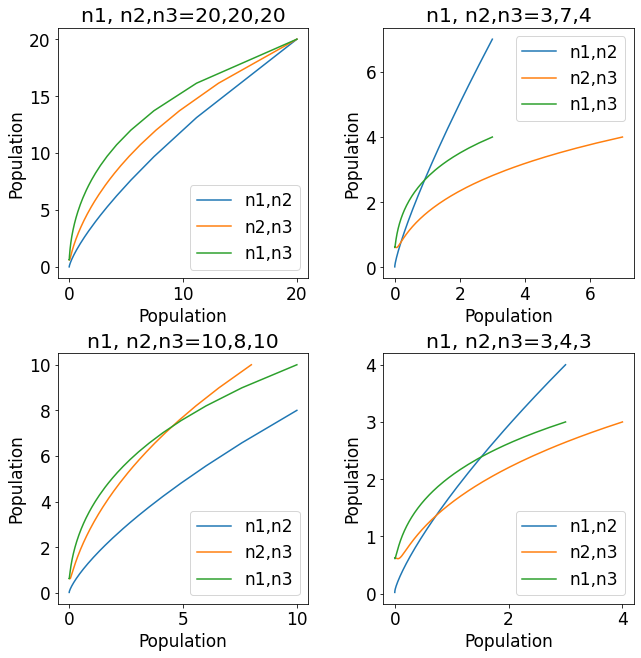

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 1.2
a21 = 0.26
a23 = 0.9
a32 = 0.21
a31 = 0.21
r1 = 0.5
r2 = 0.5
r3 = 0.5

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 7, 4]
n30 = [20,10, 4,3]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(10,10))


for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])

# Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(n1,n2, label= "n1,n2")
        axs[i, 0].plot( n2, n3,  label= "n2,n3")
        axs[i, 0].plot( n1, n3, label= "n1,n3")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i,0].set_ylabel('Population',fontsize=17)
        axs[i,0].set_xlabel('Population',fontsize=17)
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(n1,n2,label= "n1,n2" )
        axs[j, 1].plot( n2,n3,  label= "n2,n3")
        axs[j, 1].plot( n1, n3, label= "n1,n3")
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j,1].set_ylabel('Population', fontsize=17)
        axs[j,1].set_xlabel('Population',fontsize=17)
        axs[j,1].legend()

plt.rcParams.update({'font.size':17})
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig("numpure1")
plt.show()


##  Intransitive Competition

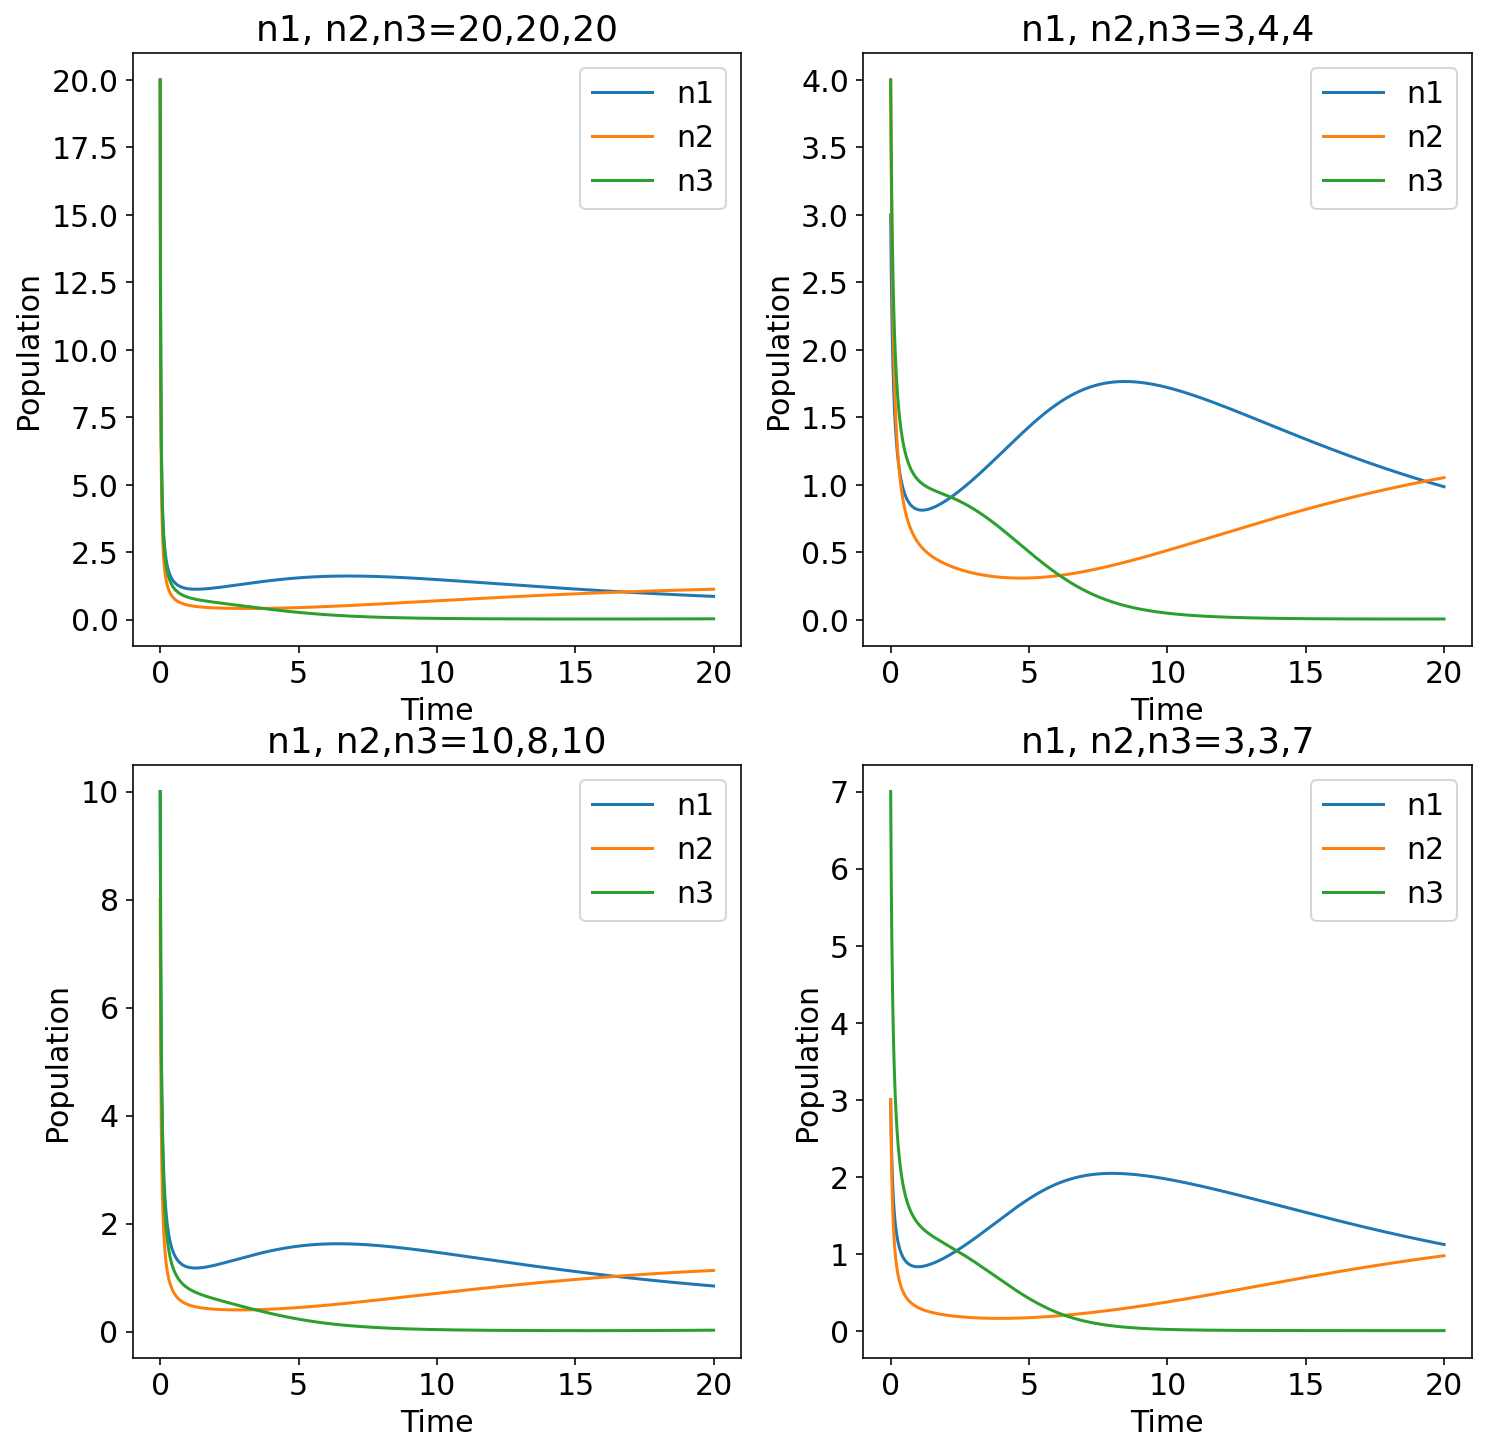

In [100]:
# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 0.7
a21 = 0.7
a23 = 1.2
a32 = 0.7
a31 = 1.2
r1 = 2
r2 = 2
r3 = 2

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 4, 3]
n30 = [20,10, 4,7]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(12,12))


for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])

    # Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(t,n1, label= "n1")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i, 0].plot( t, n2,  label= "n2")
        axs[i, 0].plot( t, n3, label= "n3")
        axs[i,0].set_ylabel('Population')
        axs[i,0].set_xlabel('Time')
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(t,n1,label= "n1" )
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j, 1].plot( t, n2,  label= "n2")
        axs[j, 1].plot( t, n3, label= "n3")
        axs[j,1].set_ylabel('Population')
        axs[j,1].set_xlabel('Time')
        axs[j,1].legend()
plt.rcParams.update({'font.size':12})
plt.savefig("numintra")
plt.show()

##  Phase potraits for Intransitive Competition

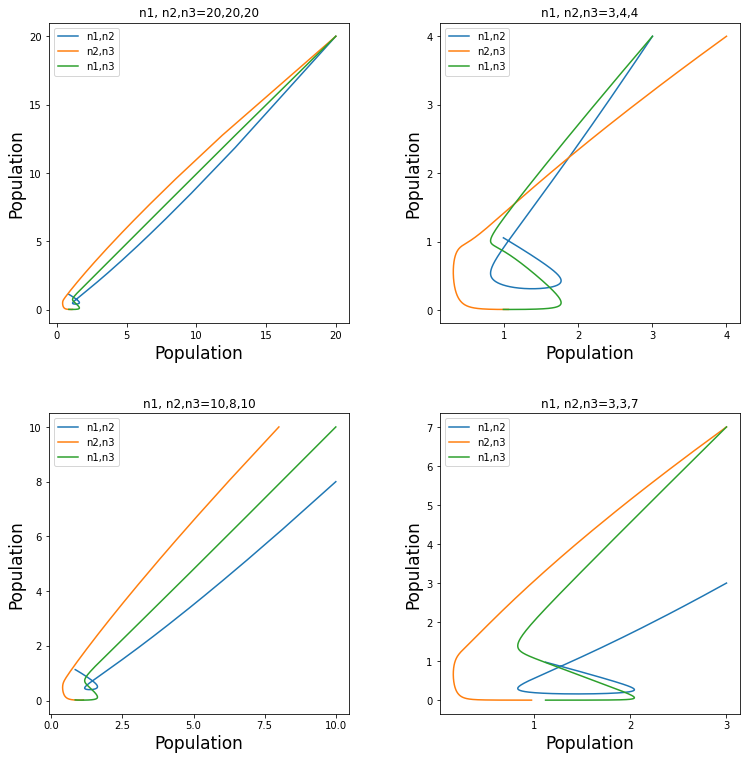

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 0.7
a21 = 0.7
a23 = 1.2
a32 = 0.7
a31 = 1.2
r1 = 2
r2 = 2
r3 = 2

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 4, 3]
n30 = [20,10, 4,7]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(12,12))
for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])
# Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(n1,n2, label= "n1,n2")
        axs[i, 0].plot( n2, n3,  label= "n2,n3")
        axs[i, 0].plot( n1, n3, label= "n1,n3")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i,0].set_ylabel('Population',fontsize=17)
        axs[i,0].set_xlabel('Population',fontsize=17)
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(n1,n2,label= "n1,n2" )
        axs[j, 1].plot( n2,n3,  label= "n2,n3")
        axs[j, 1].plot( n1, n3, label= "n1,n3")
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j,1].set_ylabel('Population', fontsize=17)
        axs[j,1].set_xlabel('Population',fontsize=17)
        axs[j,1].legend()

plt.rcParams.update({'font.size':17})
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig("numintra1")
plt.show()


## Pure Intransitive Competition

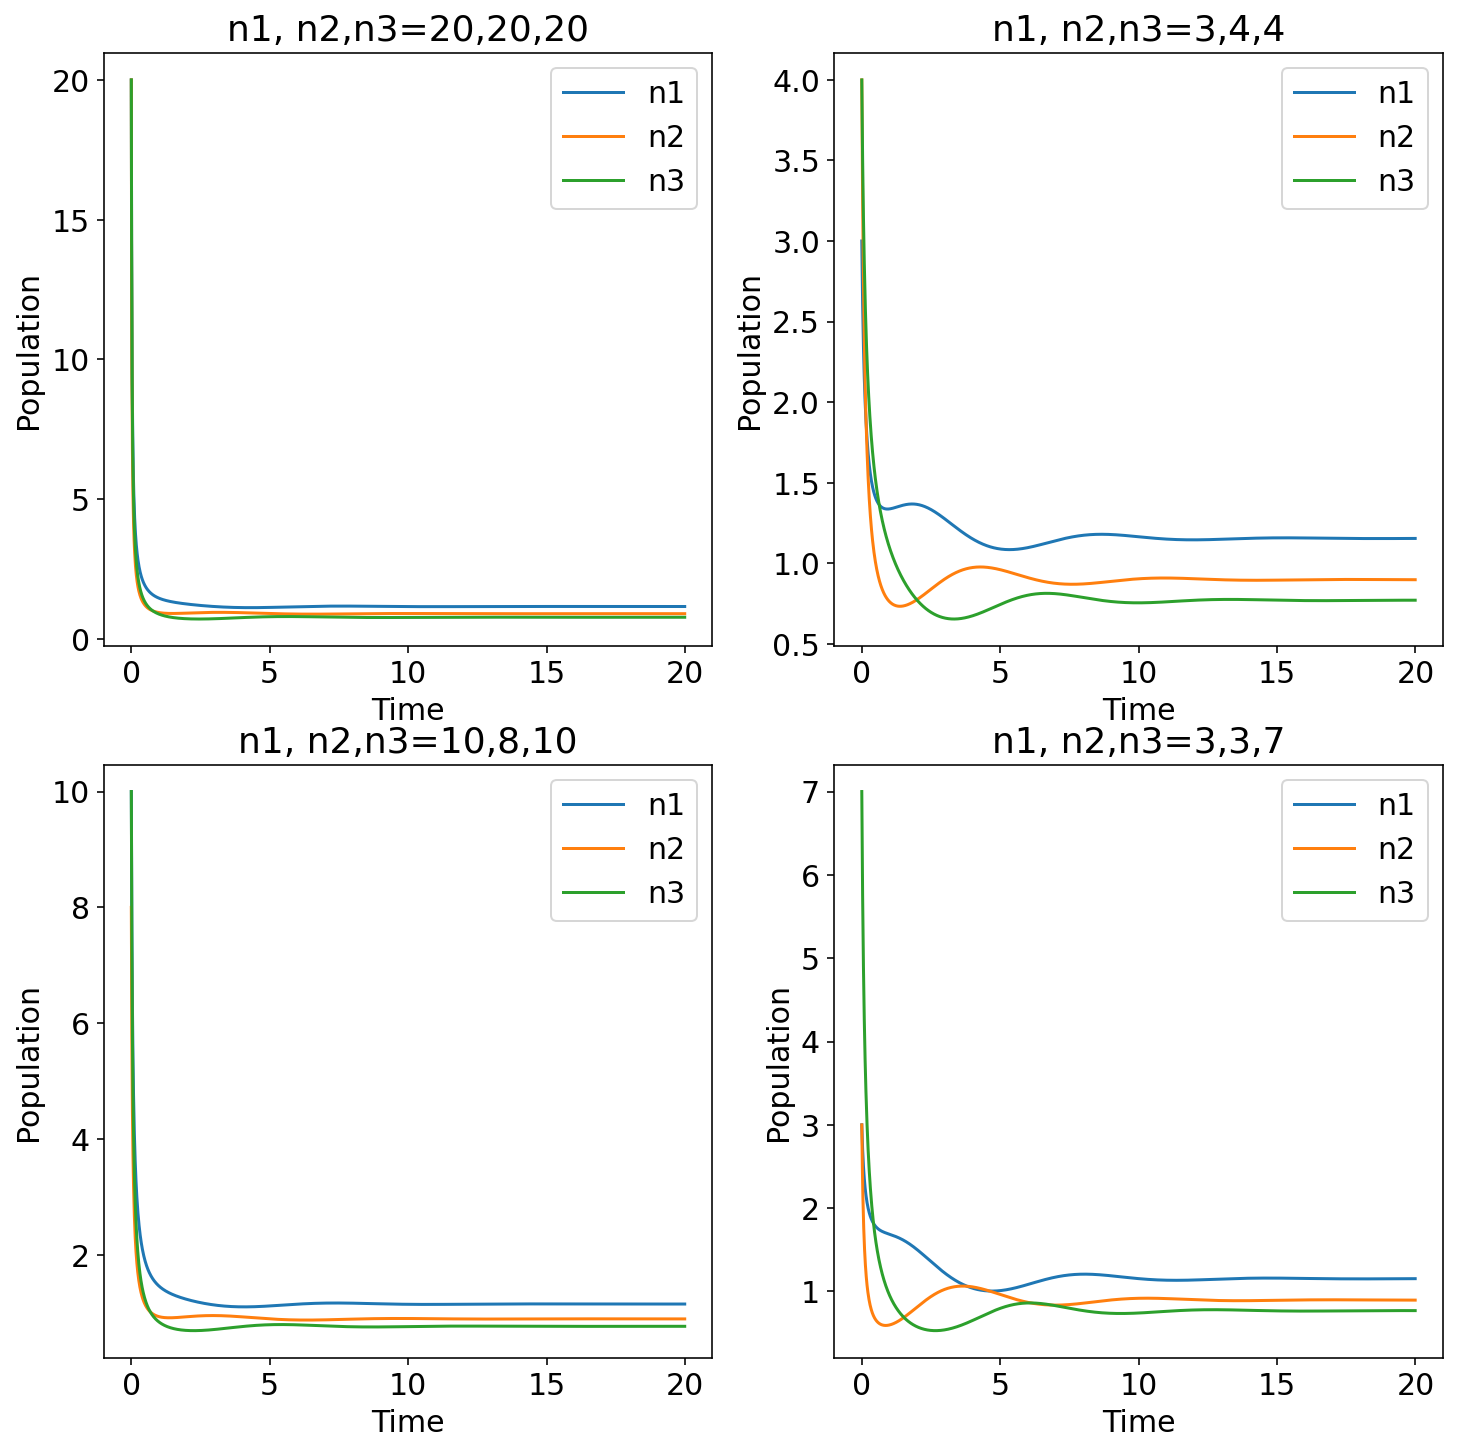

In [41]:
# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 0.0
a21 = 0.0
a23 = 1.2
a32 = 0.0
a31 = 1.2
r1 = 2
r2 = 2
r3 = 2

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 4, 3]
n30 = [20,10, 4,7]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(12,12))


for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])

    # Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(t,n1, label= "n1")
        axs[i, 0].plot( t, n2,  label= "n2")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i, 0].plot( t, n3, label= "n3")
        axs[i,0].set_ylabel('Population')
        axs[i,0].set_xlabel('Time')
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(t,n1,label= "n1" )
        axs[j, 1].plot( t, n2,  label= "n2")
        axs[j, 1].plot( t, n3, label= "n3")
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j,1].set_ylabel('Population')
        axs[j,1].set_xlabel('Time')
        axs[j,1].legend()

plt.rcParams.update({'font.size':17})
plt.savefig("pureintra")
plt.show()

## Phase potraits for Pure Intransitive Competition

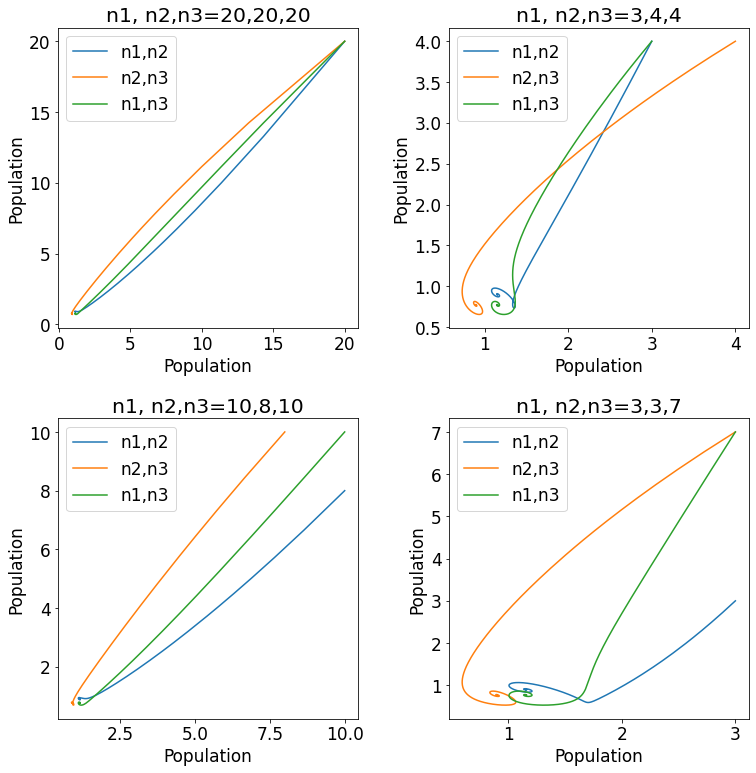

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Lotka-Volterra Model Parameters
a11 = 0.8
a22 = 1.2
a33 = 0.8
a12 = 1.2
a13 = 0.0
a21 = 0.0
a23 = 1.2
a32 = 0.0
a31 = 1.2
r1 = 2
r2 = 2
r3 = 2

# Sample Time
dt = 0.01

# Simulation Time
N = 2000
t = np.arange(N)*dt

# Initial Values
n10 = [20,10, 3, 3]
n20 = [20,8, 4, 3]
n30 = [20,10, 4,7]

# Dynamics of The Model
def f(n1, n2, n3):
    n1dot = n1*(r1 -a11*n1 - a12*n2-a13*n3)
    n2dot = n2*(r2 -a21*n1 - a22*n2-a23*n3)
    n3dot = n3*(r3 -a31*n1 - a32*n2-a33*n3)
    return n1dot, n2dot,n3dot 

# State Transition using Runge-Kutta Method
def next(n1, n2, n3):
    n1dot1, n2dot1,n3dot1 = f(n1, n2,n3)
    n1dot2, n2dot2,n3dot2 = f(n1 + n1dot1*dt/2, n2 + n2dot1*dt/2, n3 + n3dot1*dt/2)
    n1dot3, n2dot3,n3dot3 = f(n1 + n1dot2*dt/2, n2 + n2dot2*dt/2, n3 + n3dot2*dt/2)
    n1dot4, n2dot4,n3dot4 = f(n1 + n1dot3*dt/2, n2 + n2dot3*dt/2, n3 + n3dot3*dt/2)
    n1new = n1 + (n1dot1 + 2*n1dot2 + 2*n1dot3 + n1dot4)*dt/6
    n2new = n2 + (n2dot1 + 2*n2dot2 + 2*n2dot3 + n2dot4)*dt/6
    n3new = n3 + (n3dot1 + 2*n3dot2 + 2*n3dot3 + n3dot4)*dt/6
    return n1new, n2new, n3new

# Simulation Loop
n1 = np.zeros(N)
n2 = np.zeros(N)
n3 = np.zeros(N)

fig, axs = plt.subplots(2, 2,figsize=(12,12))
for i in range(4):
    
    n1[0] = n10[i]
    n2[0] = n20[i]
    n3[0] = n30[i]
    for k in range(N-1):
        n1[k+1], n2[k+1], n3[k+1]= next(n1[k], n2[k], n3[k])
# Plot Results
    #plt.subplot(1,2,1)
    if i<= 1:
        #j = 0
        axs[i, 0].plot(n1,n2, label= "n1,n2")
        axs[i, 0].plot( n2, n3,  label= "n2,n3")
        axs[i, 0].plot( n1, n3, label= "n1,n3")
        axs[i, 0].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[i,0].set_ylabel('Population',fontsize=17)
        axs[i,0].set_xlabel('Population',fontsize=17)
        axs[i,0].legend()
    else:
        j = i - 2
        axs[j, 1].plot(n1,n2,label= "n1,n2" )
        axs[j, 1].plot( n2,n3,  label= "n2,n3")
        axs[j, 1].plot( n1, n3, label= "n1,n3")
        axs[j, 1].title.set_text("n1, n2,n3="+str(n10[i]) +","+str(n20[i])+","+str(n30[i]))
        axs[j,1].set_ylabel('Population', fontsize=17)
        axs[j,1].set_xlabel('Population',fontsize=17)
        axs[j,1].legend()

plt.rcParams.update({'font.size':17})
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
plt.savefig("numpureintra1")
plt.show()
